In [2]:
import glob
# glob.glob('../data/names/yob*')
# <glob 과정중에 특정 범위를 찾고 싶을때>
glob.glob('../data/names/yob201[0-5].txt') # ->2010-2015 txt파일 불러오기

['../data/names\\yob2010.txt',
 '../data/names\\yob2011.txt',
 '../data/names\\yob2012.txt',
 '../data/names\\yob2013.txt',
 '../data/names\\yob2014.txt',
 '../data/names\\yob2015.txt']

In [3]:
import pandas as pd

In [16]:
columns = ['name','sex','births']
baby = []
years = range(2000, 2010)

In [37]:
for yy in years:
    file = '../data/names/yob%d.txt' %yy
    print(file)
    df = pd.read_csv(file, names=columns)
    df['year']=yy
    baby.append(df)
print(len(baby))

../data/names/yob2000.txt
../data/names/yob2001.txt
../data/names/yob2002.txt
../data/names/yob2003.txt
../data/names/yob2004.txt
../data/names/yob2005.txt
../data/names/yob2006.txt
../data/names/yob2007.txt
../data/names/yob2008.txt
../data/names/yob2009.txt
60


In [30]:
row_concat = pd.concat(baby, ignore_index = True)
print(row_concat.head(30))

         name sex  births  year
0       Emily   F   25956  2000
1      Hannah   F   23082  2000
2     Madison   F   19968  2000
3      Ashley   F   17997  2000
4       Sarah   F   17702  2000
5      Alexis   F   17629  2000
6    Samantha   F   17265  2000
7     Jessica   F   15709  2000
8   Elizabeth   F   15099  2000
9      Taylor   F   15078  2000
10     Lauren   F   14175  2000
11     Alyssa   F   13553  2000
12      Kayla   F   13312  2000
13    Abigail   F   13090  2000
14    Brianna   F   12879  2000
15     Olivia   F   12852  2000
16       Emma   F   12552  2000
17      Megan   F   11434  2000
18      Grace   F   11285  2000
19   Victoria   F   10925  2000
20     Rachel   F   10675  2000
21       Anna   F   10589  2000
22     Sydney   F   10242  2000
23    Destiny   F    9850  2000
24     Morgan   F    9502  2000
25   Jennifer   F    9386  2000
26    Jasmine   F    9097  2000
27      Haley   F    9069  2000
28      Julia   F    8766  2000
29    Kaitlyn   F    8758  2000


In [31]:
row_concat.groupby('sex').births.sum()

sex
F    73855596
M    79787964
Name: births, dtype: int64

In [32]:
### 그래프 한글 깨질때
import matplotlib.pyplot as plt
%matplotlib inline

from matplotlib import font_manager, rc
# - 기호 깨지는것 방지
plt.rcParams['axes.unicode_minus'] = False

f_path = "C:/Windows/Fonts/malgun.ttf"

font_name = font_manager.FontProperties(fname = f_path).get_name()
rc('font', family=font_name)

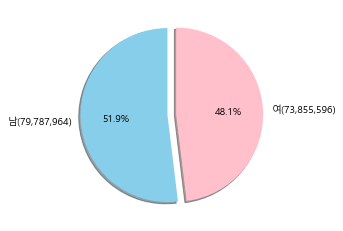

In [33]:
# 2. 2010~2015에 출생한 전체 남/녀 수의 합을 구하세요.
fcount = sum(row_concat[row_concat['sex'] == 'F']['births'])
mcount = sum(row_concat[row_concat['sex'] == 'M']['births'])
labels = ('남({:,})'. format(mcount), '여({:,})'.format(fcount))
sizes = [mcount, fcount]
colors = ['skyblue', 'pink']
explode = (0, 0.1)
plt.pie(sizes, explode = explode, labels = labels, colors = colors, autopct = '%1.1f%%', shadow=True, startangle=90)
plt.show()

In [34]:
import seaborn as sns
import matplotlib.pyplot as plt

Text(0.5, 1.0, '연도별 남/여 숫자')

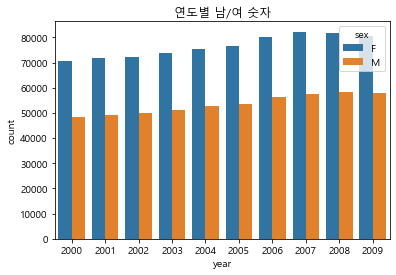

In [35]:
# 3 년도별 남여 출생 추이 그래프를 그리세요.
ax = plt.subplots()
ax = sns.countplot(x = 'year', hue = 'sex', data = row_concat )
ax.set_title('연도별 남/여 숫자')